In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import TomekLinks

In [24]:
# Load the dataset
data = pd.read_csv('E:\Disease Outbreaks Prediction\datasets\parkinsons.csv')
# Split dataset into features and target variable
X = data.drop(columns=["status","name"])
y = data["status"]

# Apply Tomek Links for undersampling
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X, y)


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_40056\1483533147.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('E:\Disease Outbreaks Prediction\datasets\parkinsons.csv')


In [26]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardize features (recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9211
Confusion Matrix:
[[ 8  2]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.96      0.95        28

    accuracy                           0.92        38
   macro avg       0.91      0.88      0.89        38
weighted avg       0.92      0.92      0.92        38



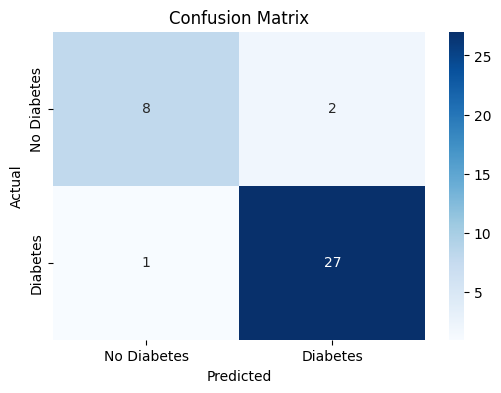

In [30]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()